# **Prediction of Mental Health using various Machine Learning Algorithms By 101 Group**

# **Library and Data Loading**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

# Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Naive bayes
from sklearn.naive_bayes import GaussianNB

# Stacking
from mlxtend.classifier import StackingClassifier

In [ ]:
survey_df = pd.read_csv('/content/drive/MyDrive/CIS 678 - Machine Learning - Project/Data/survey.csv')
print(survey_df.shape) # (1259,27)
print(survey_df.describe())
print(survey_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

In [ ]:
survey_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# **Data Cleaning**

In [ ]:
# missing data

# Calculate the percentage of missing data for each column
missing_data_percent = survey_df.isnull().mean() * 100

# Display columns with missing data percentage above 20%
high_missing_data = missing_data_percent[missing_data_percent > 20].sort_values(ascending=False)
print("Columns with more than 20% missing data:\n", high_missing_data)

Columns with more than 20% missing data:
 comments          86.973789
state             40.905481
work_interfere    20.969023
dtype: float64


In [ ]:
# Dealing with missing data

survey_df.drop(['comments'], axis = 1, inplace=True)
survey_df.drop(['state'], axis = 1, inplace=True)
survey_df.drop(['Timestamp'], axis = 1, inplace=True)

survey_df.isnull().sum().max()
survey_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
# Cleaning NaN

defaultInt = 0  # Use 0 for integers
defaultString = 'NaN'  # Use 'NaN' (or another placeholder) for strings
defaultFloat = 0.0  # Use 0.0 for floats

# Create lists categorizing features by their data type.
# This helps in applying the appropriate default values based on the type of data.
intFeatures = ['Age']
stringFeatures = [
    'Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
    'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave',
    'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'phys_health_interview', 'mental_vs_physical',
    'obs_consequence', 'benefits', 'care_options', 'wellness_program', 'seek_help'
]
floatFeatures = []  # Empty in this case

# Iterate over each column in the DataFrame.
for feature in survey_df.columns:
    # Depending on the feature's data type, fill missing values with the corresponding default.
    if feature in intFeatures:
        survey_df[feature] = survey_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        survey_df[feature] = survey_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        survey_df[feature] = survey_df[feature].fillna(defaultFloat)
    else:
        # If a feature is not recognized (not listed in any of the above categories),
        # print an error message. This is a safety check.
        print(f'Error: Feature {feature} not recognized.')

# Display the first few rows of the cleaned DataFrame to verify the changes.
survey_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
# Clean Gender

gender = survey_df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [ ]:
# Making Gender Groups

male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

# Define a function to standardize the gender based on the provided lists.
def standardize_gender(gender):
    gender = gender.lower().strip()  # Normalize case and strip whitespace.
    if gender in male_str:
        return 'male'
    elif gender in female_str:
        return 'female'
    elif gender in trans_str:
        return 'trans'
    else:
        return 'other'  # For any gender not captured by the lists, categorize as 'other'.

# Apply the standardize_gender function to the 'Gender' column.
survey_df['Gender'] = survey_df['Gender'].apply(standardize_gender)

# Filter out non-standard genders if needed. In this case, we'll keep 'male', 'female', and 'trans', not including other because it contains ['A little about you' & 'p']
# Adjust this list if you decide 'other' should be included or excluded.
survey_df = survey_df[survey_df['Gender'].isin(['male', 'female', 'trans'])]

# Verify the changes by printing unique values in the 'Gender' column.
print(survey_df['Gender'].unique())



['female' 'male' 'trans']


In [ ]:
# Complete missing values in 'Age' with the median of the column
# This approach is chosen because the median is less sensitive to outliers than the mean.
survey_df['Age'].fillna(survey_df['Age'].median(), inplace=True)

# Correct age values that are unrealistic (<18 or >120) by replacing them with the median age
survey_df.loc[survey_df['Age'] < 18, 'Age'] = survey_df['Age'].median()
survey_df.loc[survey_df['Age'] > 120, 'Age'] = survey_df['Age'].median()

# Categorize 'Age' into ranges
# The pd.cut function is used to divide the 'Age' column into bins
# The bins are specified to cover ranges from 0-20, 21-30, 31-65, and 66-100
# Labels are assigned to each bin
survey_df['age_range'] = pd.cut(survey_df['Age'],
                                bins=[0, 20, 30, 65, 100],
                                labels=["0-20", "21-30", "31-65", "66-100"],
                                include_lowest=True)

# Display the DataFrame to verify changes
print(survey_df[['Age', 'age_range']].head())

   Age age_range
0   37     31-65
1   44     31-65
2   32     31-65
3   31     31-65
4   31     31-65


<ipython-input-50-c1d7a8bf4374>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['Age'].fillna(survey_df['Age'].median(), inplace=True)
<ipython-input-50-c1d7a8bf4374>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['age_range'] = pd.cut(survey_df['Age'],


In [ ]:
# There are only 0.014% of self employed so let's change NaN to NO self_employed
# Replace "NaN" string from defaultString
survey_df['self_employed'] = survey_df['self_employed'].replace([defaultString], 'No')
print(survey_df['self_employed'].unique())

['No' 'Yes']


<ipython-input-51-720aba7bd8f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['self_employed'] = survey_df['self_employed'].replace([defaultString], 'No')


In [ ]:
# There are only 0.20% of self work_interfere so let's change NaN to "Don't know
# Replace "NaN" string from defaultString

survey_df['work_interfere'] = survey_df['work_interfere'].replace([defaultString], 'Don\'t Know')
print(survey_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't Know"]


<ipython-input-52-49c891734bc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['work_interfere'] = survey_df['work_interfere'].replace([defaultString], 'Don\'t Know')


# **Encoding Data**

In [ ]:
# Encoding data

# Initialize a dictionary to store label encodings for each column
labelDict = {}

# Loop through each column in the DataFrame
for feature in survey_df:
    # Initialize the LabelEncoder
    le = preprocessing.LabelEncoder()
    # Fit and transform the data - this encodes the original data
    survey_df[feature] = le.fit_transform(survey_df[feature])
    # Store the original labels (now as keys in the encoder's mapping) in labelDict
    labelKey = 'label_' + feature
    labelDict[labelKey] = list(le.classes_)  # Use list to convert the numpy array to a list

# Print each feature's label encoding mapping
for key, value in labelDict.items():
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't Know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

In [ ]:
# Getting rid of 'Country' since it is not needed
survey_df = survey_df.drop(['Country'], axis = 1)
survey_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [ ]:
# Checking if there is any missing data after cleaning
survey_df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
age_range                    0
dtype: int64

# **Covariance Matrix, Variability comparison between categories of variables and Some Visualizations to see data relationship**

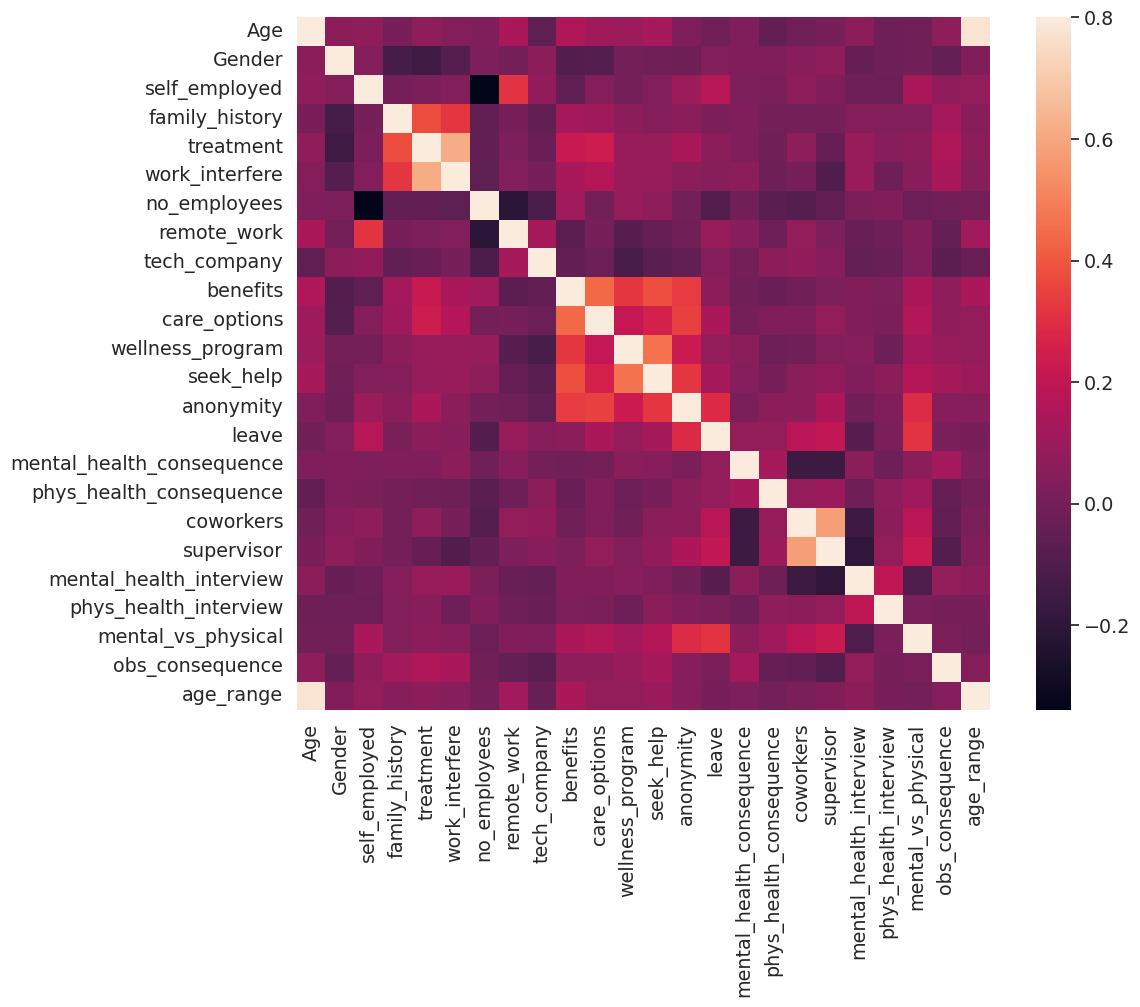

In [ ]:
# Correlation Matrix

# Compute the correlation matrix for the survey_df DataFrame
corr_matrix = survey_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, vmax=0.8, square=True)

# Display the heatmap
plt.show()

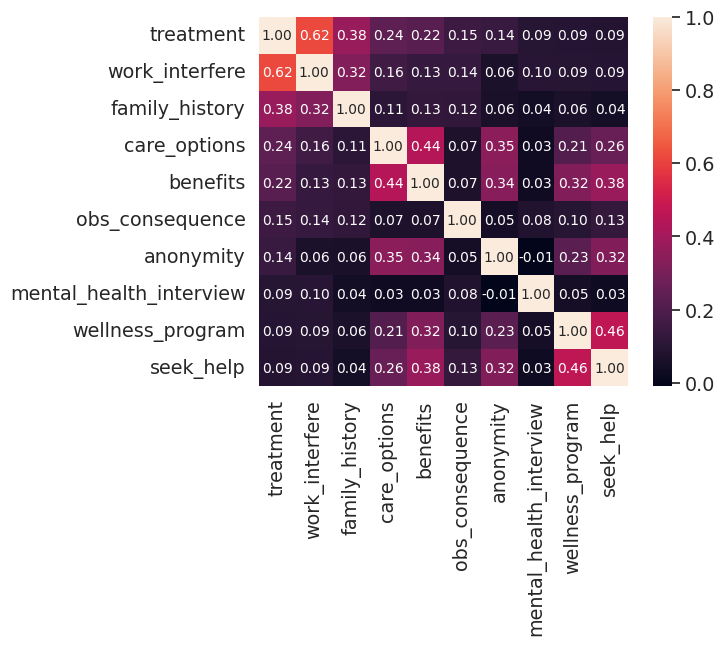

In [ ]:
# Treatment Correlation Matrix

# Set the number of variables for the heatmap
k = 10

# Select the top k features most correlated with 'treatment', including 'treatment' itself
cols = corr_matrix.nlargest(k, 'treatment')['treatment'].index

# Compute the correlation matrix for the selected columns
cm = survey_df[cols].corr()

# Increasing font scale for better readability
sns.set(font_scale=1.25)

# Generate a heatmap for the correlation matrix
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)

# Display the heatmap
plt.show()

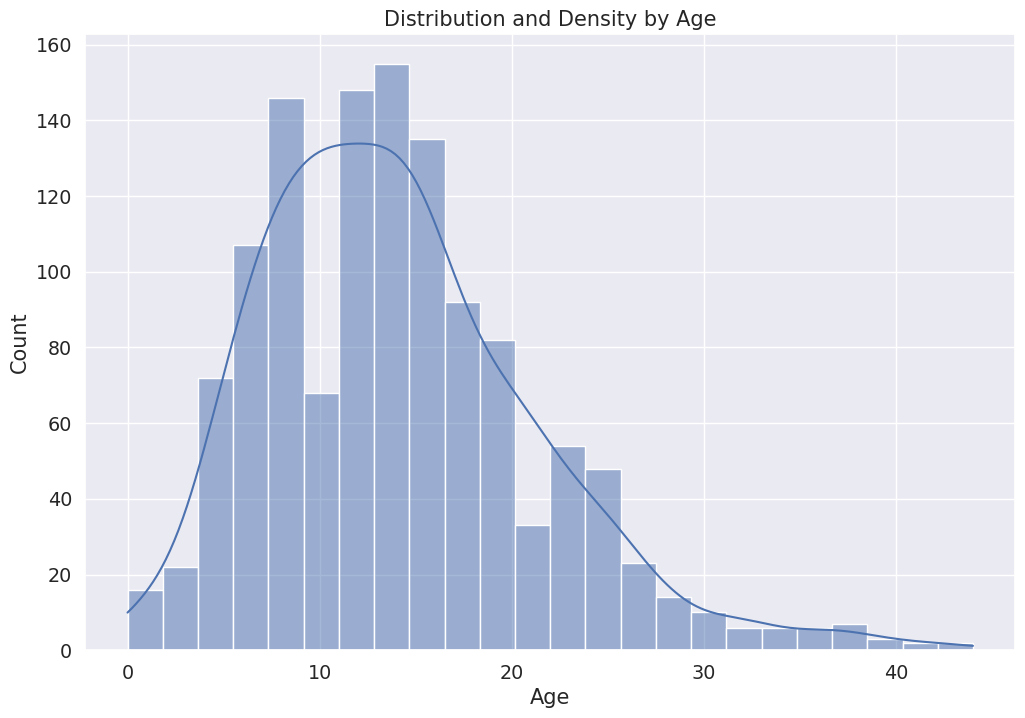

In [ ]:
# Distribution and Density by Age

plt.figure(figsize=(12, 8))

# The 'kde' parameter adds a Kernel Density Estimate plot to show the density distribution.
sns.histplot(survey_df["Age"], bins=24, kde=True)

# Setting the title and labels for the plot
plt.title("Distribution and Density by Age")
plt.xlabel("Age")

# Display the plot
plt.show()

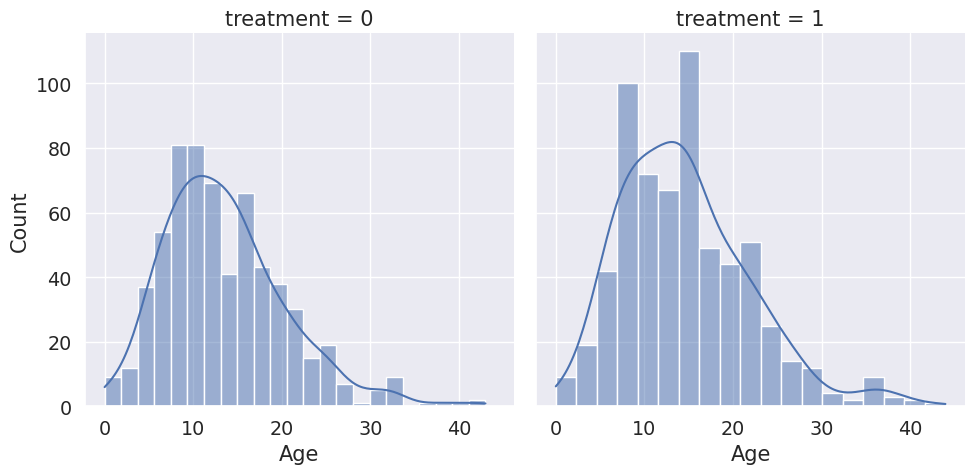

In [ ]:
# Separate by treatment

# Initialize a FacetGrid with separate plots for each category in 'treatment'.
facet_grid = sns.FacetGrid(survey_df, col='treatment', height=5)

# Map a histogram (distplot is deprecated) to each facet, specifying 'kde=True' for density plot.
# 'Age' is the column to be plotted.
facet_grid = facet_grid.map(sns.histplot, 'Age', kde=True)

# Display the plots
facet_grid

<ipython-input-60-e2cd4d2a0d01>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  count_plot.set_xticklabels(labels)


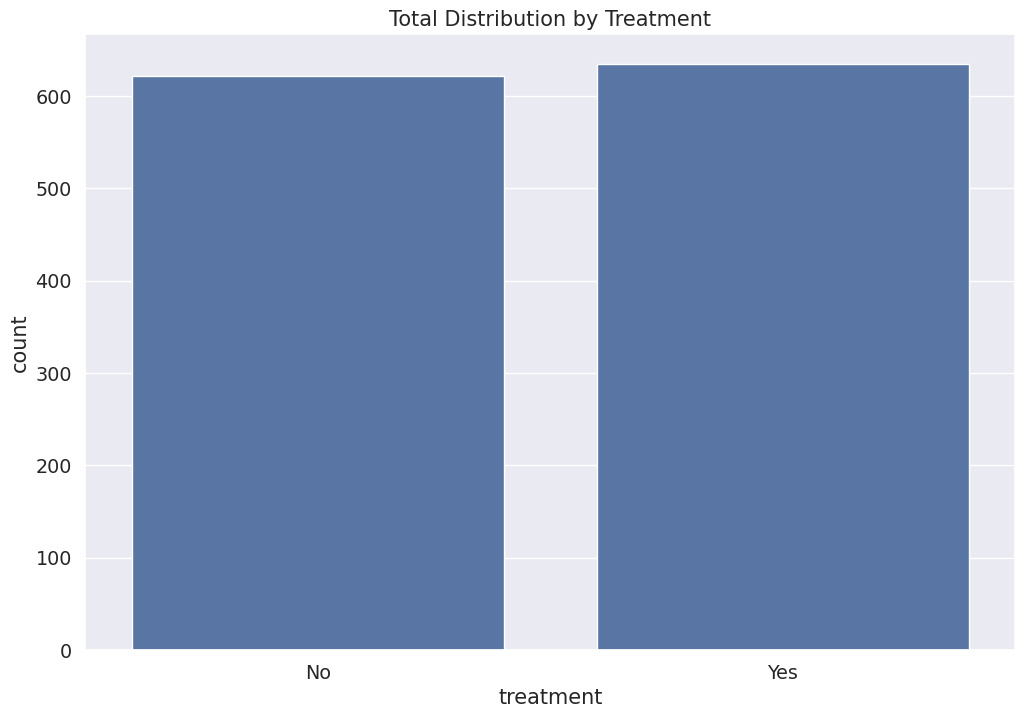

In [ ]:
# How Many People Have Been Treated?

# Set the figure size for better visibility
plt.figure(figsize=(12, 8))

# Create a count plot for the "treatment" column in the train_df DataFrame
count_plot = sns.countplot(x="treatment", data=survey_df)

# Here, we manually set labels for demonstration; adjust as necessary to match your data
labels = ['No', 'Yes']
count_plot.set_xticklabels(labels)

# Setting the title of the plot
plt.title('Total Distribution by Treatment')

# Display the plot
plt.show()

<ipython-input-61-6d53cf7be96a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.catplot(x="age_range", y="treatment", hue="Gender", data=survey_df,


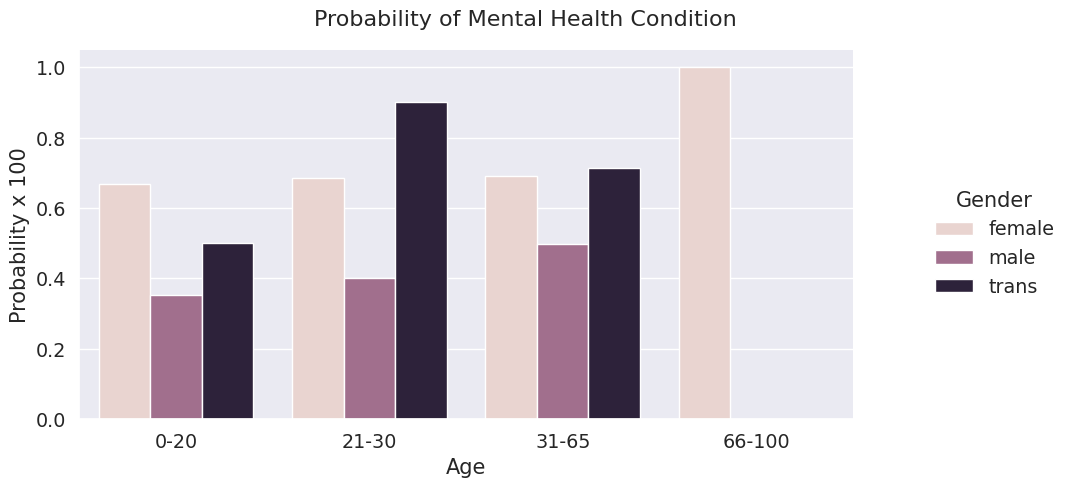

In [ ]:
# Nested barplot to show probabilities for class and sex

age_range_labels = labelDict['label_age_range']
gender_labels = labelDict['label_Gender']

# Use sns.catplot to create a nested bar plot
bar_plot = sns.catplot(x="age_range", y="treatment", hue="Gender", data=survey_df,
                       kind="bar", ci=None, height=5, aspect=2, legend_out=True)

# Set custom x-tick labels based on age range labels from labelDict
bar_plot.set_xticklabels(age_range_labels)

# Setting plot title and axis labels
bar_plot.fig.suptitle('Probability of Mental Health Condition', fontsize=16)
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels with custom labels from labelDict for 'Gender'
new_labels = gender_labels
for t, l in zip(bar_plot._legend.texts, new_labels):
    t.set_text(l)

# Adjust subplot parameters and position the legend outside the plot
bar_plot.fig.subplots_adjust(top=0.9, right=0.8)

# Display the plot
plt.show()

<ipython-input-62-b64d02cf05f8>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  probability_plot = sns.catplot(x="family_history", y="treatment", hue="Gender", data=survey_df,


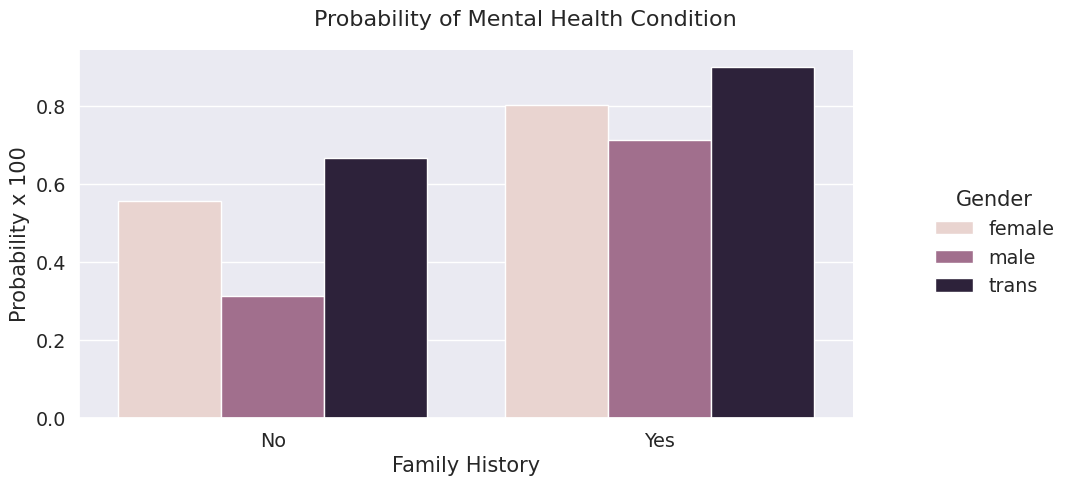

In [ ]:
# Barplot to show probabilities for family history

family_history_labels = labelDict['label_family_history']
gender_labels = labelDict['label_Gender']

# Creating a bar plot using sns.catplot for the 'family_history' vs 'treatment' probability, with 'Gender' as hue
probability_plot = sns.catplot(x="family_history", y="treatment", hue="Gender", data=survey_df,
                               kind="bar", ci=None, height=5, aspect=2, legend_out=True)

# Setting custom x-tick labels based on the family history labels from labelDict
probability_plot.set_xticklabels(family_history_labels)

# Setting the title and axis labels with appropriate sizes for clarity
probability_plot.fig.suptitle('Probability of Mental Health Condition', fontsize=16)
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# Replacing legend labels with the custom labels from labelDict for 'Gender'
# Updating the legend directly through the returned FacetGrid object
for text, label in zip(probability_plot._legend.texts, gender_labels):
    text.set_text(label)

# Adjusting subplot parameters and positioning the legend outside the plot for better visibility
probability_plot.fig.subplots_adjust(top=0.9, right=0.8)

# Displaying the plot
plt.show()

<ipython-input-63-1bdbe03f6e66>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.catplot(x="care_options", y="treatment", hue="Gender", data=survey_df,


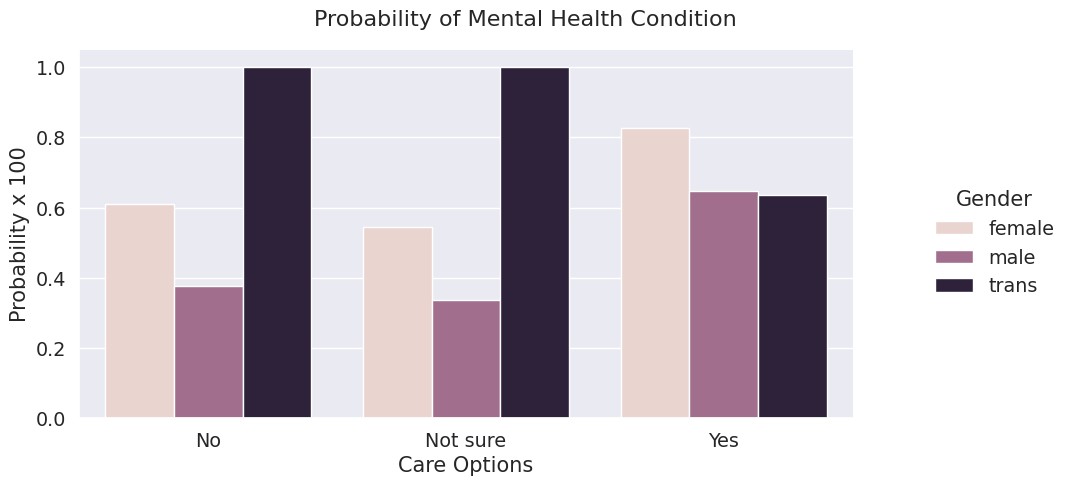

In [ ]:
# Barplot to show probabilities for care options

care_options_labels = labelDict['label_care_options']
gender_labels = labelDict['label_Gender']

# Use sns.catplot to create a bar plot that shows probabilities for treatment based on care options
bar_plot = sns.catplot(x="care_options", y="treatment", hue="Gender", data=survey_df,
                       kind="bar", ci=None, height=5, aspect=2, legend_out=True)

# Set custom x-tick labels based on care options labels from labelDict
bar_plot.set_xticklabels(care_options_labels)

# Setting plot title and axis labels for clarity
bar_plot.fig.suptitle('Probability of Mental Health Condition', fontsize=16)
plt.ylabel('Probability x 100')
plt.xlabel('Care Options')

# Replace legend labels with custom labels from labelDict for 'Gender'
# This updates the legend labels to be more meaningful based on your dataset
for text, label in zip(bar_plot._legend.texts, gender_labels):
    text.set_text(label)

# Adjust subplot parameters and position the legend outside the plot
# This ensures the legend does not overlap with the plot itself
bar_plot.fig.subplots_adjust(top=0.9, right=0.8)

# Display the plot
plt.show()

<ipython-input-64-a0798f346ea5>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.catplot(x="benefits", y="treatment", hue="Gender", data=survey_df,


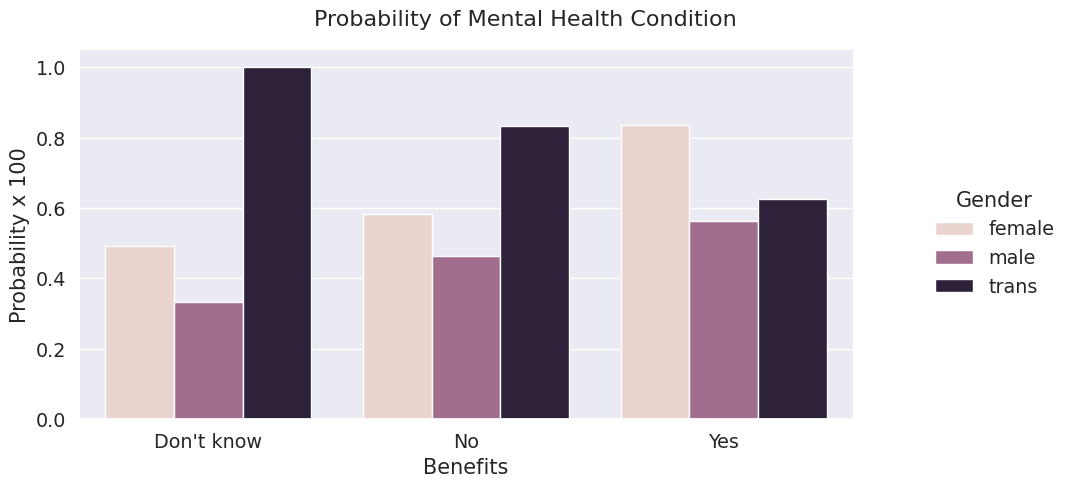

In [ ]:
# Barplot to show probabilities for benefits

benefits_labels = labelDict['label_benefits']
gender_labels = labelDict['label_Gender']

# Use sns.catplot to create a bar plot that shows probabilities for treatment based on benefits
bar_plot = sns.catplot(x="benefits", y="treatment", hue="Gender", data=survey_df,
                       kind="bar", ci=None, height=5, aspect=2, legend_out=True)

# Set custom x-tick labels based on benefits labels from labelDict
bar_plot.set_xticklabels(benefits_labels)

# Setting plot title and axis labels for a clear understanding of the plot's focus
bar_plot.fig.suptitle('Probability of Mental Health Condition', fontsize=16)
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

for text, label in zip(bar_plot._legend.texts, gender_labels):
    text.set_text(label)

# Adjust subplot parameters and position the legend outside the plot
# This step ensures the legend is clearly visible and does not overlap with the plot
bar_plot.fig.subplots_adjust(top=0.9, right=0.8)

# Display the plot
plt.show()

<ipython-input-65-faf7919377c7>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=survey_df,


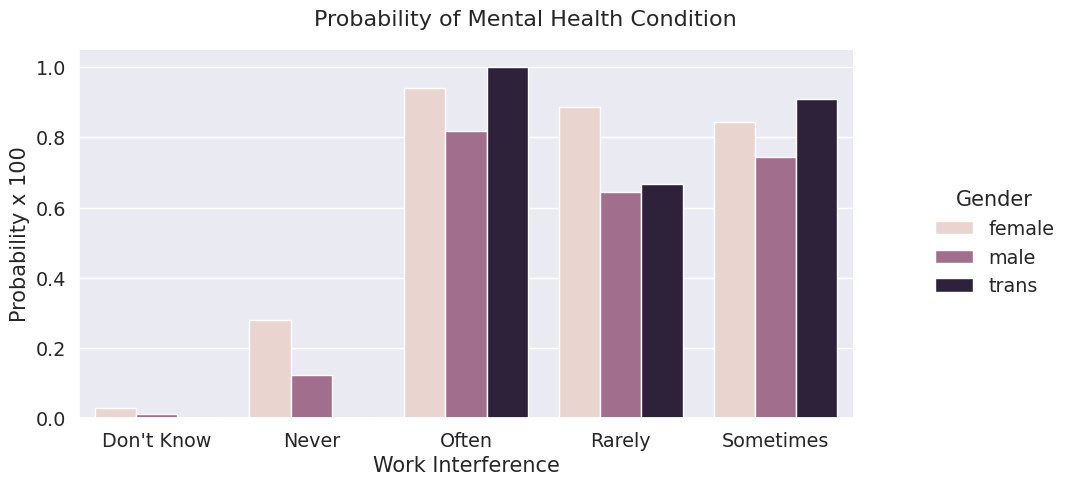

In [ ]:
# Barplot to show probabilities for work intefere


work_interfere_labels = labelDict['label_work_interfere']
gender_labels = labelDict['label_Gender']

# Create a bar plot using sns.catplot to show probabilities for treatment
# based on the level of work interference, separated by gender
bar_plot = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=survey_df,
                       kind="bar", ci=None, height=5, aspect=2, legend_out=True)

# Set custom x-tick labels based on work interference levels from labelDict
bar_plot.set_xticklabels(work_interfere_labels)

# Set plot title and axis labels for better understanding of the visualized data
bar_plot.fig.suptitle('Probability of Mental Health Condition', fontsize=16)
plt.ylabel('Probability x 100')
plt.xlabel('Work Interference')

# Replace legend labels with the meaningful labels defined in labelDict for 'Gender'
for text, label in zip(bar_plot._legend.texts, gender_labels):
    text.set_text(label)

# Adjust subplot parameters to position the legend outside the plot
bar_plot.fig.subplots_adjust(top=0.9, right=0.8)

# Display the plot
plt.show()

# **Scaling and Fitting**

Feature scaling, We are going to scale Age, since it is extremely different from the other ones.

In [ ]:
# Scaling Age

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the 'Age' column and replace the original 'Age' column with the scaled values
# The fit_transform method requires a 2D array, hence the double brackets around 'Age'
survey_df['Age'] = scaler.fit_transform(survey_df[['Age']])

# Display the first few rows of the DataFrame to check the scaled 'Age' column
survey_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Splitting Dataset

In [ ]:
# Define the feature columns and the target variable
feature_columns = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere', 'wellness_program', 'seek_help']
X = survey_df[feature_columns]  # Features
y = survey_df['treatment']      # Target variable

# Split the dataset into training and testing sets with a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Initialize dictionaries to store model performance metrics
# 'methodDict' will store accuracy scores, while 'rmseDict' is reserved for RMSE values
methodDict = {}
rmseDict = {}  # Changed from a tuple to a dictionary for consistency and to allow for key-value pairing


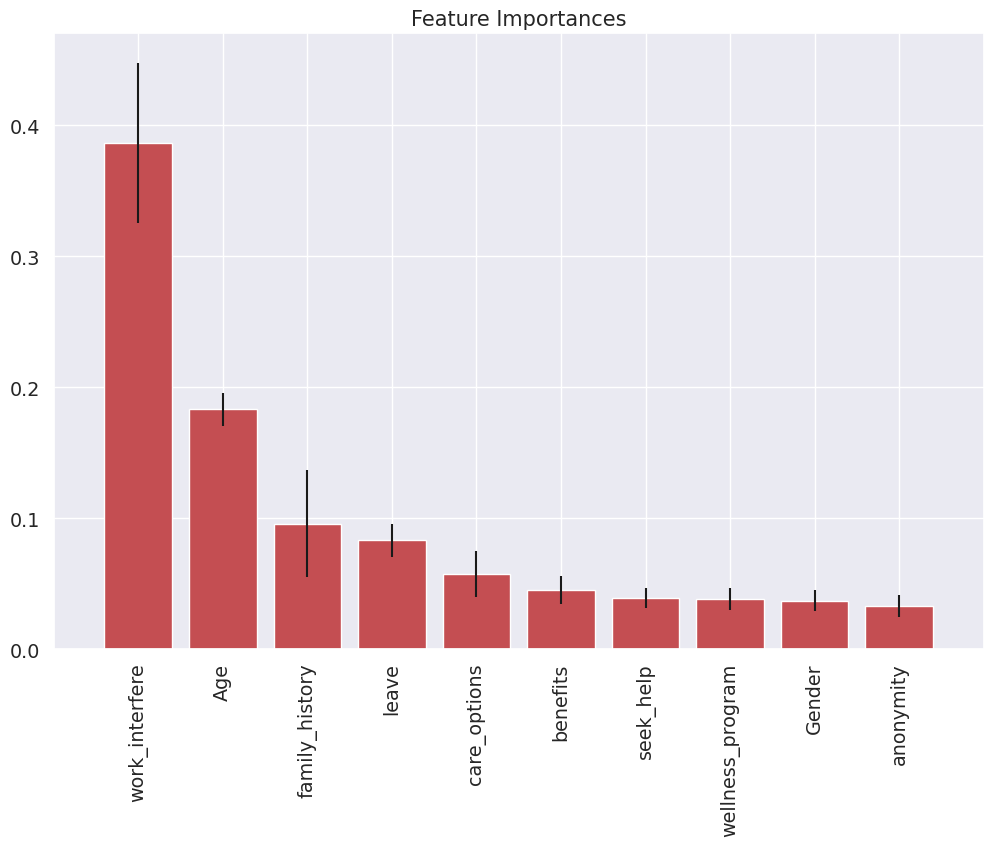

In [ ]:
# Building a forest and compute the feature importances

# Initialize and fit an Extra Trees Classifier to compute feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

# Retrieve the feature importances from the model
importances = forest.feature_importances_

# Calculate the standard deviation of feature importances across all trees
std_dev = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Prepare labels for the plot based on sorted feature importance indices
sorted_labels = [feature_columns[i] for i in sorted_indices]

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[sorted_indices], color="r", yerr=std_dev[sorted_indices], align="center")

# Set the x-ticks to be the names of the features, and rotate labels vertically for better readability
plt.xticks(range(X.shape[1]), sorted_labels, rotation='vertical')

# Set the x-axis limits
plt.xlim([-1, X.shape[1]])

# Display the plot
plt.show()

# **Tuning**

In [ ]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))

    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())

    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())

    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())

    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)

    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))

    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)

    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))


    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))

    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]

    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)

        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')


    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob) # Changing this

    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################

    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)



    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()

        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)



    return accuracy

In [ ]:
# Tuning with cross validation score

def tuningCV(knn):

  # search for an optimal value of K for KNN
  k_range = list(range(1,31))
  k_scores = []
  for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
    k_scores.append(scores.mean())
  print(k_sccores)

  # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
  plt.plot(k_range, k_scores)
  plt.xlabel('Value of K for KNN')
  plt.ylabel('Cross-Validated Accuracy')
  plt.show()

In [ ]:
# Tuning with GridSearchCV

def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    k_range = list(range(1, 31))
    print(k_range)

    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)

    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)

    # view the complete results (list of named tuples)
    grid.grid_scores_

    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)

    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)

    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)


In [ ]:
# Tuning with RandomizedSearchCV

def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_

    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)

    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [ ]:
# Tuning with searching multiple paramters simultaneously

def tuningMultParam(knn):

    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']

    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid)

    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)

    # view the complete results
    print(grid.grid_scores_)

    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

# **Evaluating Models**

### **Logistic Regression**

In [ ]:
# Logistic Regression

def logisticRegression():

  # Train a Logistic Regression model on the training set
  logreg = LogisticRegression()
  logreg.fit(X_train, y_train)

  # Make class predicition for the testing set

  y_pred_class = logreg.predict(X_test)

  accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)

  # Data for final graph

  methodDict['Logistic Regression'] = accuracy_score * 100

Accuracy: 0.8015873015873016
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


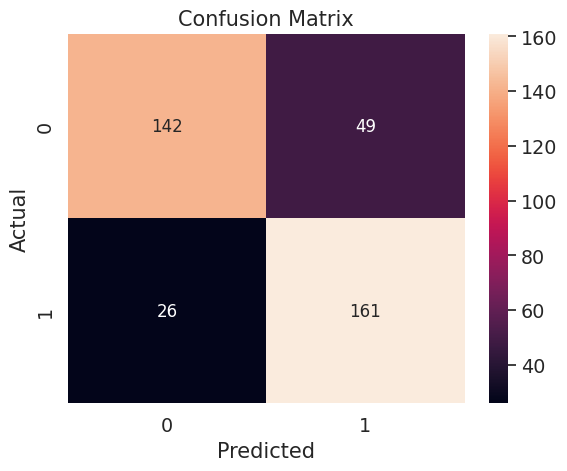

Classification Accuracy: 0.8015873015873016
Classification Error: 0.19841269841269837
False Positive Rate: 0.25654450261780104
Precision: 0.7666666666666667
AUC Score: 0.8022090321135593
Cross-validated AUC: 0.8752992953453782
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 0 0]
First 10 predicted probabilities of class members:
 [[0.06934047 0.93065953]
 [0.95429271 0.04570729]
 [0.96075055 0.03924945]
 [0.77446268 0.22553732]
 [0.3512952  0.6487048 ]
 [0.03500517 0.96499483]
 [0.78481659 0.21518341]
 [0.19263402 0.80736598]
 [0.61414705 0.38585295]
 [0.51666865 0.48333135]]
First 10 predicted probabilities:
 [[0.93065953]
 [0.04570729]
 [0.03924945]
 [0.22553732]
 [0.6487048 ]
 [0.96499483]
 [0.21518341]
 [0.80736598]
 [0.38585295]
 [0.48333135]]


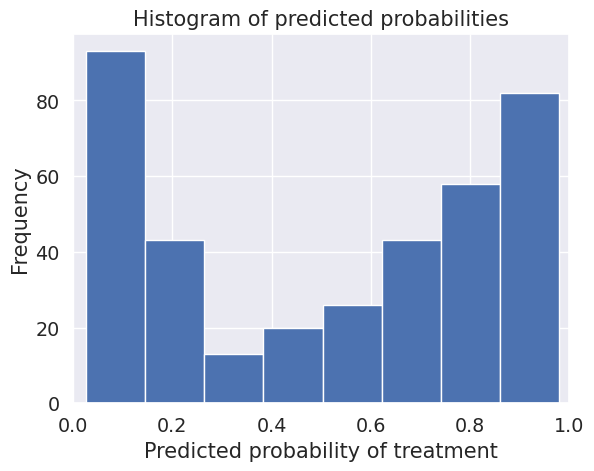

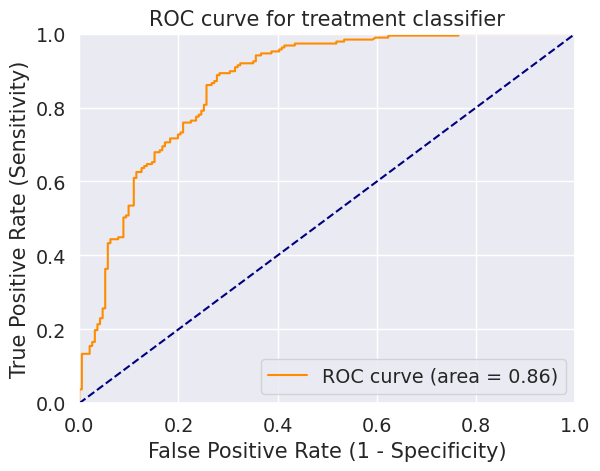

[[142  49]
 [ 26 161]]


In [ ]:
logisticRegression()

### **KNeighbors Classifier**

In [ ]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)

    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']

    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)

    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)

    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['K-Neighbors'] = accuracy_score * 100

Rand. Best Score:  0.8241396825396825
Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 27}
[0.821, 0.824, 0.819, 0.819, 0.822, 0.819, 0.824, 0.819, 0.821, 0.824, 0.819, 0.819, 0.824, 0.82, 0.815, 0.824, 0.819, 0.817, 0.824, 0.819]
Accuracy: 0.7962962962962963
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


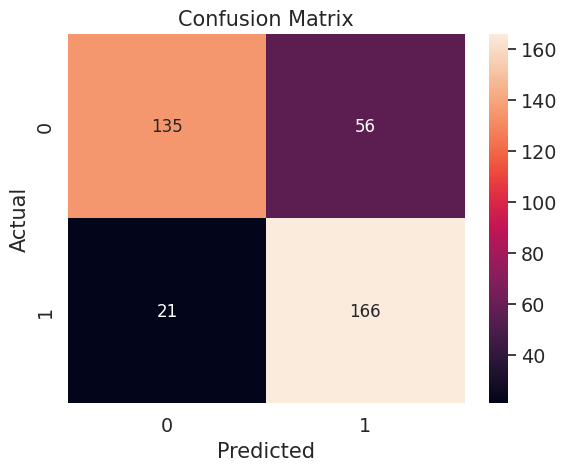

Classification Accuracy: 0.7962962962962963
Classification Error: 0.20370370370370372
False Positive Rate: 0.2931937172774869
Precision: 0.7477477477477478
AUC Score: 0.7972534087409358
Cross-validated AUC: 0.8776805842558051
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.14814815 0.85185185]
 [1.         0.        ]
 [1.         0.        ]
 [0.62962963 0.37037037]
 [0.37037037 0.62962963]
 [0.03703704 0.96296296]
 [0.62962963 0.37037037]
 [0.37037037 0.62962963]
 [0.33333333 0.66666667]
 [0.25925926 0.74074074]]
First 10 predicted probabilities:
 [[0.85185185]
 [0.        ]
 [0.        ]
 [0.37037037]
 [0.62962963]
 [0.96296296]
 [0.37037037]
 [0.62962963]
 [0.66666667]
 [0.74074074]]


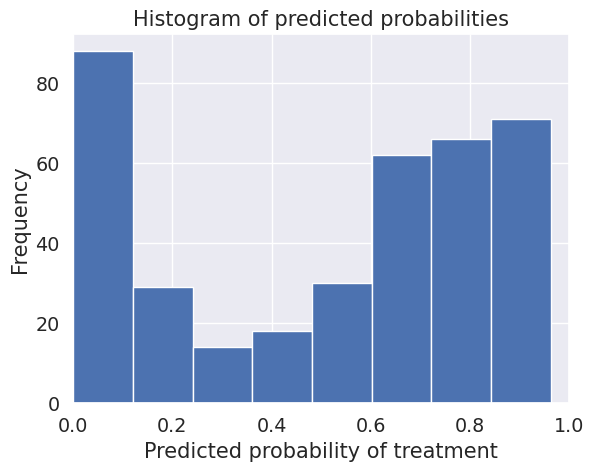

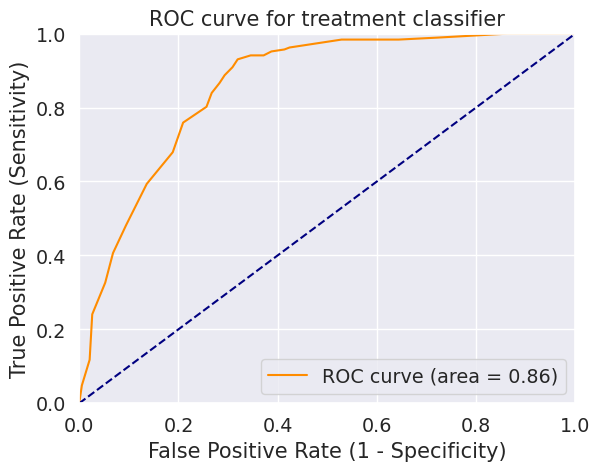

[[135  56]
 [ 21 166]]


In [ ]:
Knn()

### **Decision Tree classifier**

In [ ]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_columns.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)

    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)

    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Decision Tree Classifier'] = accuracy_score * 100

Rand. Best Score:  0.8305206349206349
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 7, 'min_samples_split': 2}
[0.831, 0.829, 0.792, 0.831, 0.829, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.831, 0.828, 0.829, 0.831, 0.829, 0.828, 0.829]
Accuracy: 0.8068783068783069
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


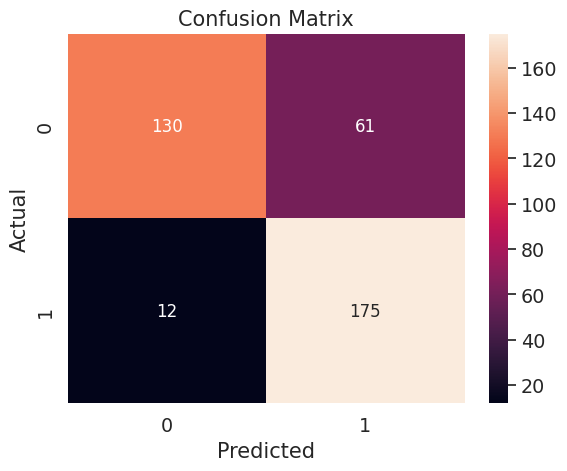

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.3193717277486911
Precision: 0.7415254237288136
AUC Score: 0.8082285746283282
Cross-validated AUC: 0.8759822438159851
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.18823529 0.81176471]
 [0.97959184 0.02040816]
 [1.         0.        ]
 [0.88135593 0.11864407]
 [0.36097561 0.63902439]
 [0.05172414 0.94827586]
 [0.88135593 0.11864407]
 [0.11320755 0.88679245]
 [0.36097561 0.63902439]
 [0.36097561 0.63902439]]
First 10 predicted probabilities:
 [[0.81176471]
 [0.02040816]
 [0.        ]
 [0.11864407]
 [0.63902439]
 [0.94827586]
 [0.11864407]
 [0.88679245]
 [0.63902439]
 [0.63902439]]


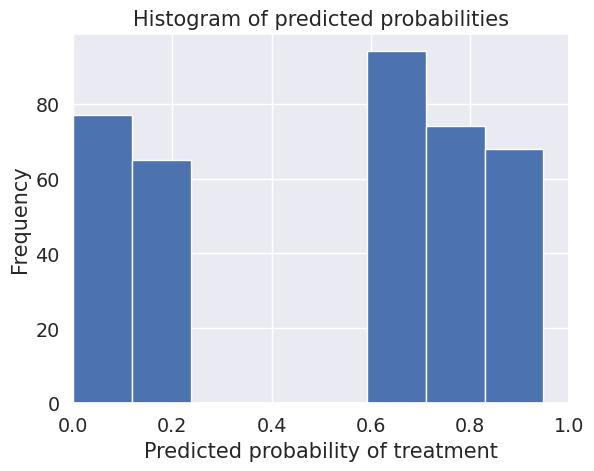

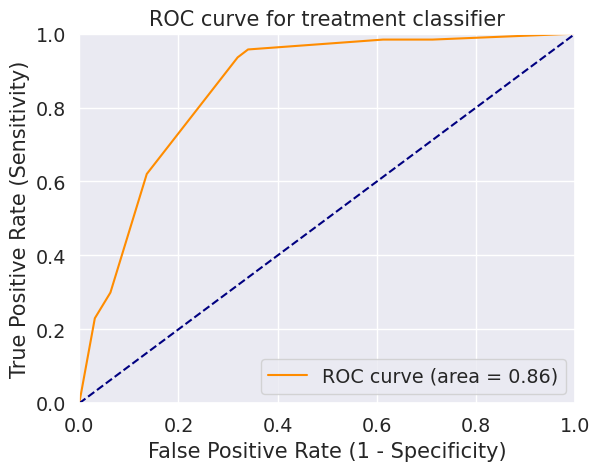

[[130  61]
 [ 12 175]]


In [ ]:
treeClassifier()

## **Decision Tree Classifer**

In [ ]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_columns.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)

    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)

    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Decision Tree Classifier'] = accuracy_score * 100


Rand. Best Score:  0.8305206349206349
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 7, 'min_samples_split': 2}
[0.807, 0.831, 0.827, 0.83, 0.831, 0.828, 0.829, 0.831, 0.83, 0.792, 0.831, 0.829, 0.831, 0.831, 0.831, 0.831, 0.829, 0.831, 0.823, 0.831]
Accuracy: 0.8068783068783069
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


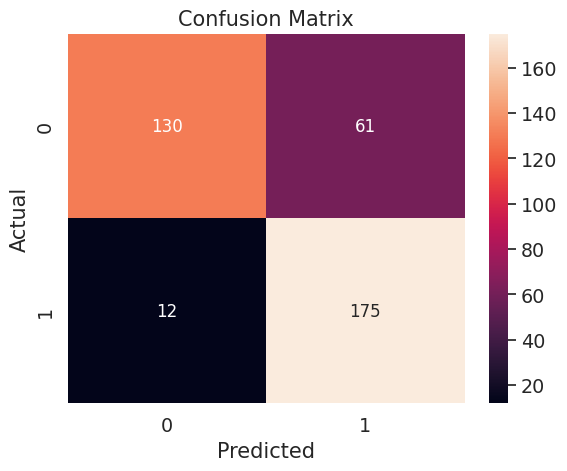

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.3193717277486911
Precision: 0.7415254237288136
AUC Score: 0.8082285746283282
Cross-validated AUC: 0.8627374913899251
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.18823529 0.81176471]
 [1.         0.        ]
 [0.98969072 0.01030928]
 [0.8778626  0.1221374 ]
 [0.36097561 0.63902439]
 [0.05172414 0.94827586]
 [0.8778626  0.1221374 ]
 [0.11320755 0.88679245]
 [0.36097561 0.63902439]
 [0.36097561 0.63902439]]
First 10 predicted probabilities:
 [[0.81176471]
 [0.        ]
 [0.01030928]
 [0.1221374 ]
 [0.63902439]
 [0.94827586]
 [0.1221374 ]
 [0.88679245]
 [0.63902439]
 [0.63902439]]


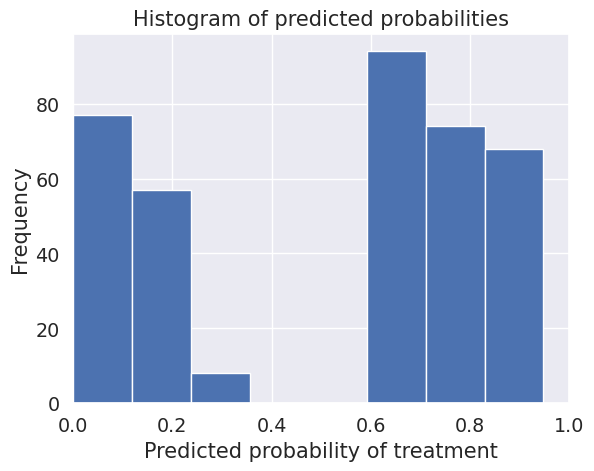

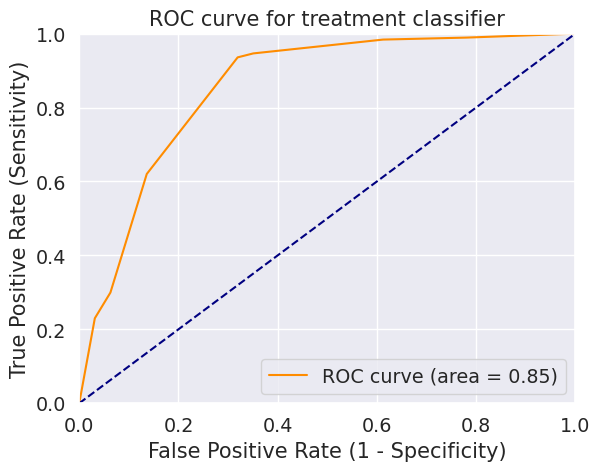

[[130  61]
 [ 12 175]]


In [ ]:
treeClassifier()

### **Random Forests**

In [ ]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_columns.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)

    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)

    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Random Forest'] = accuracy_score * 100

Rand. Best Score:  0.8305206349206349
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 7, 'min_samples_split': 2}
[0.831, 0.834, 0.831, 0.831, 0.832, 0.831, 0.831, 0.831, 0.83, 0.831, 0.831, 0.831, 0.831, 0.834, 0.831, 0.832, 0.831, 0.831, 0.833, 0.831]
Accuracy: 0.8068783068783069
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


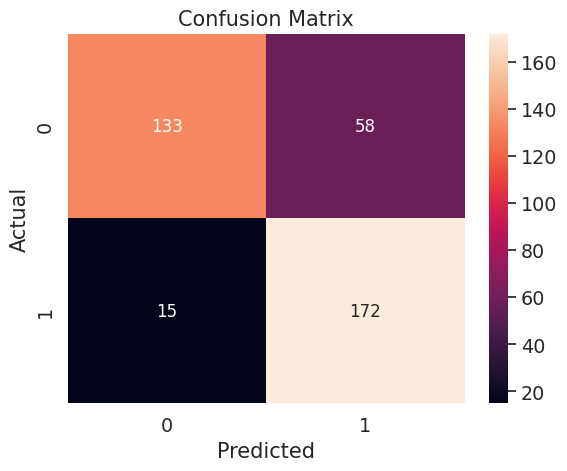

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.3036649214659686
Precision: 0.7478260869565218
AUC Score: 0.8080605873953579
Cross-validated AUC: 0.8966601926015327
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.20652558 0.79347442]
 [0.96374936 0.03625064]
 [0.98312141 0.01687859]
 [0.82604843 0.17395157]
 [0.3934641  0.6065359 ]
 [0.25126776 0.74873224]
 [0.79243513 0.20756487]
 [0.4606282  0.5393718 ]
 [0.23147948 0.76852052]
 [0.14046006 0.85953994]]
First 10 predicted probabilities:
 [[0.79347442]
 [0.03625064]
 [0.01687859]
 [0.17395157]
 [0.6065359 ]
 [0.74873224]
 [0.20756487]
 [0.5393718 ]
 [0.76852052]
 [0.85953994]]


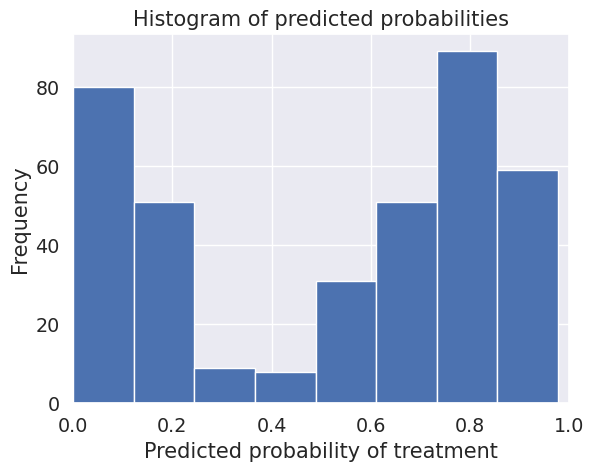

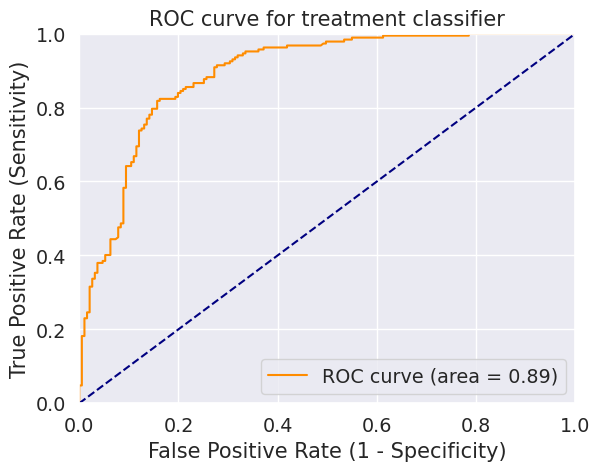

[[133  58]
 [ 15 172]]


In [ ]:
randomForest()

### **Bagging**

In [ ]:
def bagging():
    # Building and fitting
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)

    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Bagging'] = accuracy_score * 100

Accuracy: 0.7566137566137566
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


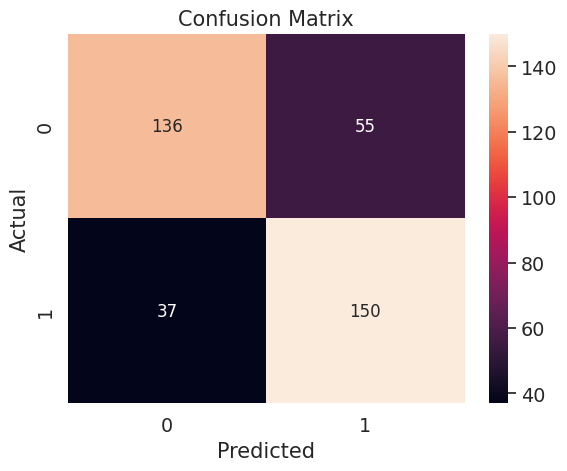

Classification Accuracy: 0.7566137566137566
Classification Error: 0.24338624338624337
False Positive Rate: 0.2879581151832461
Precision: 0.7317073170731707
AUC Score: 0.7570904611249546
Cross-validated AUC: 0.856667455288567
First 10 predicted responses:
 [1 0 0 0 0 1 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.1        0.9       ]
 [1.         0.        ]
 [1.         0.        ]
 [0.8        0.2       ]
 [0.6        0.4       ]
 [0.26666667 0.73333333]
 [0.6        0.4       ]
 [0.7        0.3       ]
 [0.         1.        ]
 [0.4        0.6       ]]
First 10 predicted probabilities:
 [[0.9       ]
 [0.        ]
 [0.        ]
 [0.2       ]
 [0.4       ]
 [0.73333333]
 [0.4       ]
 [0.3       ]
 [1.        ]
 [0.6       ]]


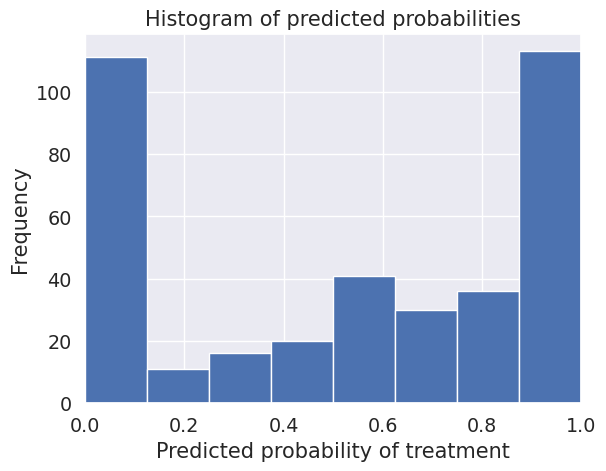

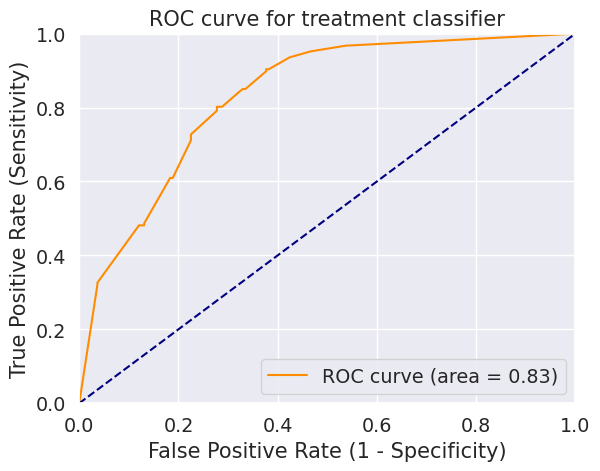

[[136  55]
 [ 37 150]]


In [ ]:
bagging()

### **Boosting**

In [ ]:
def boosting():
    # Building and fitting
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = boost.predict(X_test)

    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Boosting'] = accuracy_score * 100

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8121693121693122
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


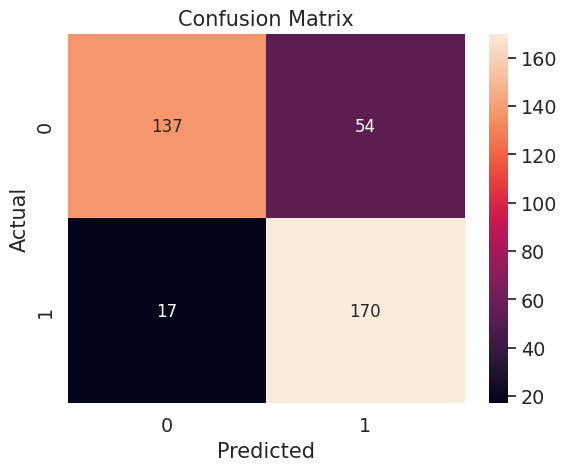

Classification Accuracy: 0.8121693121693122
Classification Error: 0.1878306878306878
False Positive Rate: 0.28272251308900526
Precision: 0.7589285714285714
AUC Score: 0.813184198000952


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Cross-validated AUC: 0.8751981206162274
First 10 predicted responses:
 [1 0 0 0 0 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.49897183 0.50102817]
 [0.50274283 0.49725717]
 [0.50290215 0.49709785]
 [0.50147369 0.49852631]
 [0.5000031  0.4999969 ]
 [0.49785131 0.50214869]
 [0.50059234 0.49940766]
 [0.49933484 0.50066516]
 [0.49920491 0.50079509]
 [0.49917344 0.50082656]]
First 10 predicted probabilities:
 [[0.50102817]
 [0.49725717]
 [0.49709785]
 [0.49852631]
 [0.4999969 ]
 [0.50214869]
 [0.49940766]
 [0.50066516]
 [0.50079509]
 [0.50082656]]


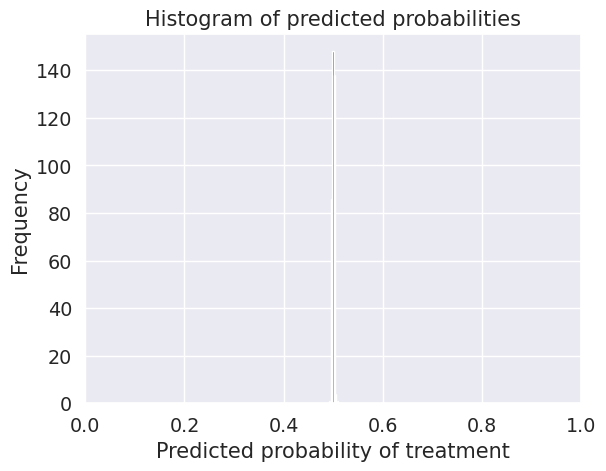

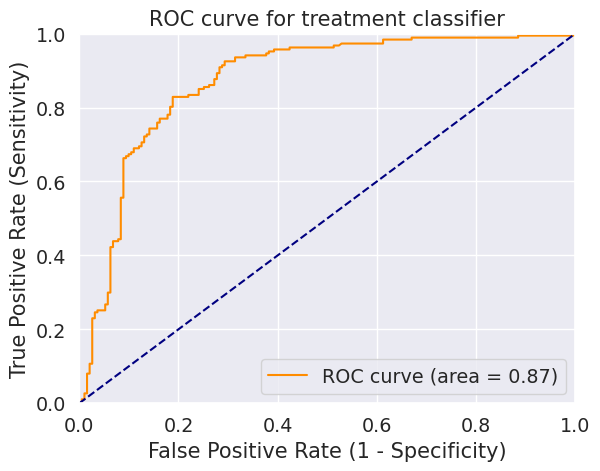

[[137  54]
 [ 17 170]]


In [ ]:
boosting()

### **Stacking**

In [ ]:
def stacking():
    # Building and fitting
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()
    stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
    stack.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = stack.predict(X_test)

    accuracy_score = evalClassModel(stack, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Stacking'] = accuracy_score * 100

Accuracy: 0.8095238095238095
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0]


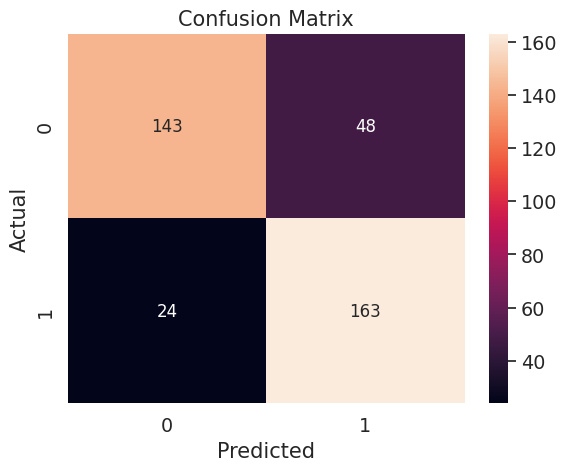

Classification Accuracy: 0.8095238095238095
Classification Error: 0.19047619047619047
False Positive Rate: 0.2513089005235602
Precision: 0.7725118483412322
AUC Score: 0.8101744267435674
Cross-validated AUC: 0.8417115965263047
First 10 predicted responses:
 [1 0 0 0 0 1 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.01165485 0.98834515]
 [0.99158023 0.00841977]
 [0.99158023 0.00841977]
 [0.99158023 0.00841977]
 [0.99158023 0.00841977]
 [0.01165485 0.98834515]
 [0.99158023 0.00841977]
 [0.9831187  0.0168813 ]
 [0.02329116 0.97670884]
 [0.01165485 0.98834515]]
First 10 predicted probabilities:
 [[0.98834515]
 [0.00841977]
 [0.00841977]
 [0.00841977]
 [0.00841977]
 [0.98834515]
 [0.00841977]
 [0.0168813 ]
 [0.97670884]
 [0.98834515]]


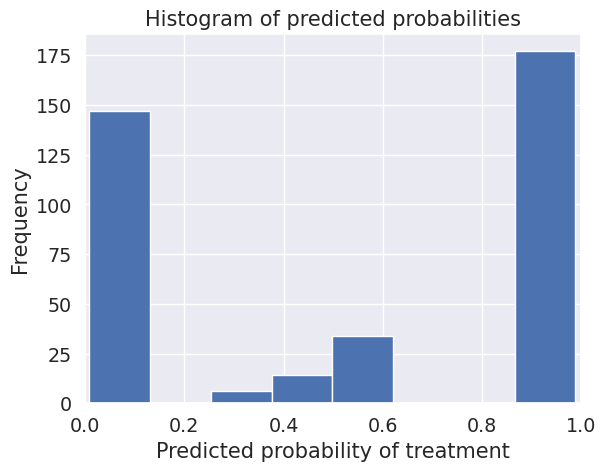

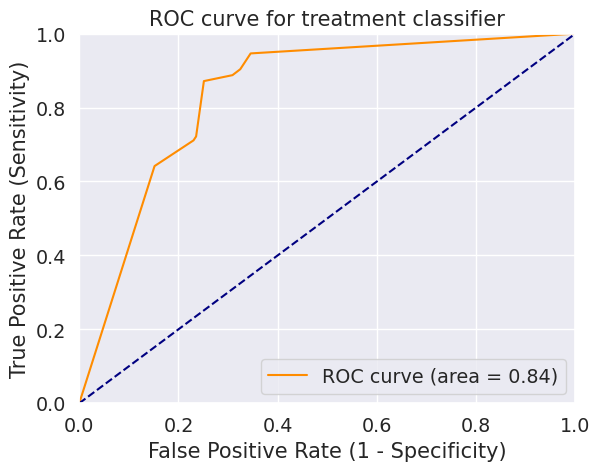

[[143  48]
 [ 24 163]]


In [ ]:
stacking()

# **Predicting with Neural Network**

In [ ]:
# Create Input Function

#%tensorflow_version 2.x
import tensorflow as tf
import argparse
import keras

In [ ]:
from tensorflow.keras.optimizers import Adagrad

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
batch_size = 100
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset

In [ ]:
# Define the feature columns

# Define Tensorflow feature columns
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
wellness_program = tf.feature_column.numeric_column("wellness_program")
seek_help = tf.feature_column.numeric_column("seek_help")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere, wellness_program, seek_help]

In [ ]:
# Instantiate an Estimator

# Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
model = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[10, 10],
    optimizer=lambda: tf.keras.optimizers.legacy.Adagrad(
        learning_rate=0.1,
        initial_accumulator_value=0.1,
        # Note: As of TensorFlow 2.x, direct setting of regularization strengths in the optimizer might not be supported.
        # L1 and L2 regularization can be applied to the model layers if necessary.
    )
)

In [ ]:
# Train the model
model.train(input_fn=lambda: train_input_fn(X_train, y_train, batch_size), steps=train_steps)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [ ]:
# Evaluate the model

# Evaluate the model.
eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(X_test, y_test, batch_size))

print('\nTest set accuracy: {accuracy:0.2f}\n'.format(**eval_result))

#Data for final graph
accuracy = eval_result['accuracy'] * 100
methodDict['Neural Network'] = accuracy

Instructions for updating:
Use tf.keras instead.



Test set accuracy: 0.79



In [ ]:
# Making predictions (inferring) from the trained model

predictions = list(model.predict(input_fn=lambda:eval_input_fn(X_train, y_train, batch_size=batch_size)))

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [ ]:
# Generate predictions from the model
template = ('\nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')

# Dictionary for predictions
col1 = []
col2 = []
col3 = []


for idx, input, p in zip(X_train.index, y_train, predictions):
    v  = p["class_ids"][0]
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id] # Probability

    # Adding to dataframe
    col1.append(idx) # Index
    col2.append(v) # Prediction
    col3.append(input) # Expecter


    #print(template.format(idx, v, 100 * probability, input))


results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
results.head()

,index,prediction,expected
0,929,0,0
1,901,1,1
2,579,1,1
3,367,1,1
4,615,0,1


# **Success Method Plot**

In [ ]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')

    plt.show()

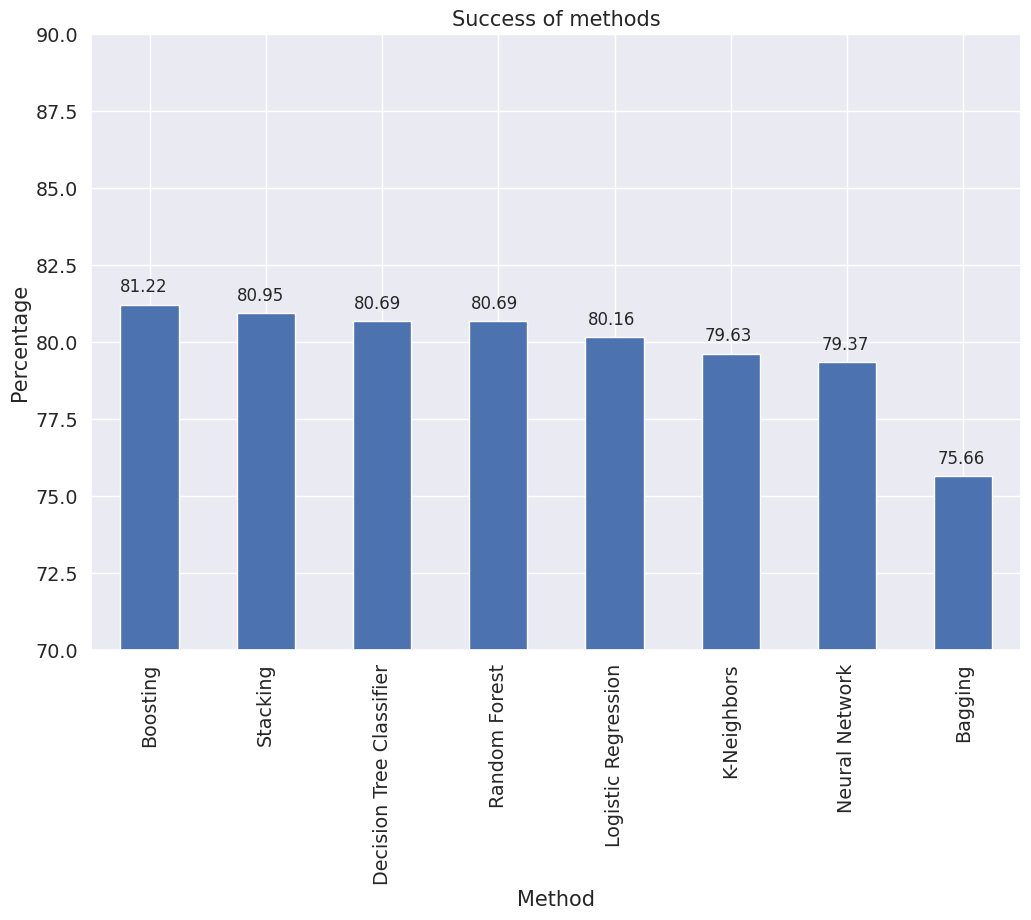

In [ ]:
plotSuccess()

# **Creating predictions on test set**

In [ ]:
# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results.head()

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0


# **Submission**

In [ ]:
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
results

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0
...,...,...
373,1084,1
374,506,0
375,1142,0
376,1124,0
